In [1]:
import numpy as np
import h5py 
import sys
sys.path.append("../src")
from L_layer_model_03.L_layer_model_old import *

In [2]:
with h5py.File("../EIDSeg_Dataset/cache/eidseg_32x32_binary_any.h5", "r") as f:
    X_train_org = f["X_train"][:]
    Y_train_org = f["Y_train"][:]
    X_test_org  = f["X_test"][:]
    Y_test_org  = f["Y_test"][:]

m_train = X_train_org.shape[0]
m_test = X_test_org.shape[0]
num_px =X_train_org.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_org.shape))
print ("train_set_y shape: " + str(Y_train_org.shape))
print ("test_set_x shape: " + str(X_test_org.shape))
print ("test_set_y shape: " + str(Y_test_org.shape))

Number of training examples: m_train = 2612
Number of testing examples: m_test = 327
Height/Width of each image: num_px = 32
Each image is of size: (32, 32, 3)
train_set_x shape: (2612, 32, 32, 3)
train_set_y shape: (1, 2612)
test_set_x shape: (327, 32, 32, 3)
test_set_y shape: (1, 327)


In [3]:
with h5py.File("../EIDSeg_Dataset/cache//eidseg_32x32_binary_any_flat.h5", "r") as f:
    train_x = f["train_x"][:]   # (12288, m)
    train_y = f["train_y"][:]   # (1, m)
    test_x  = f["test_x"][:]    # (12288, m)
    test_y  = f["test_y"][:]    # (1, m)

print ("train_set_x flatten shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x flatten shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

train_set_x flatten shape: (3072, 2612)
train_set_y shape: (1, 2612)
test_set_x flatten shape: (3072, 327)
test_set_y shape: (1, 327)


## L-layer Neural Network


In [4]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, X_test=None, Y_test=None):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)

    pos_weight = (Y.shape[1] - np.sum(Y)) / np.sum(Y)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        cost = compute_cost(AL, Y, pos_weight)
            
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(X, parameters)
        test_pred  = predict(X_test, parameters)
    
        train_acc = accuracy(train_pred, Y)
        test_acc  = accuracy(test_pred, Y_test)
    
        print(f"Final train accuracy: {train_acc*100:.2f}%")
        print(f"Final test accuracy:  {test_acc*100:.2f}%")

    
    return parameters, costs

In [5]:
layers_dims = [12288, 64, 16, 5, 1] 

X_gc = train_x[:, :5]
Y_gc = train_y[:, :5]

parameters = initialize_parameters_deep(layers_dims)
AL, caches = L_model_forward(X_gc, parameters)
grads = L_model_backward(AL, Y_gc, caches)

difference = gradient_check_L_layer(
    parameters,
    grads,
    X_gc,
    Y_gc,
    layers_dims
)


❌ Backprop error detected! difference = 2.7552063513895956e-07


In [6]:
layers_dims = [3072, 256, 64, 16, 1] 
# parameters, costs =  model(train_x, train_y, learning_rate = 0.008, num_iterations = 2000, print_cost = True)
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.008,num_iterations = 2500, print_cost = True, X_test=test_x, Y_test=test_y)

Cost after iteration 0: 0.40606203936117047
Cost after iteration 100: 0.42868061249762585
Cost after iteration 200: 0.4487868714200463
Cost after iteration 300: 0.45693217079428844
Cost after iteration 400: 0.45970947014073893
Cost after iteration 500: 0.4605803593548569
Cost after iteration 600: 0.4608911736561531
Cost after iteration 700: 0.4610149602226259
Cost after iteration 800: 0.4610567191577916
Cost after iteration 900: 0.4610665561205566
Cost after iteration 1000: 0.4610697189655372
Cost after iteration 1100: 0.4610738425992954
Cost after iteration 1200: 0.46107243414960986
Cost after iteration 1300: 0.461072363355223
Cost after iteration 1400: 0.46106943788582705
Cost after iteration 1500: 0.4610670750598367
Cost after iteration 1600: 0.4610647190840069
Cost after iteration 1700: 0.46106157820437943
Cost after iteration 1800: 0.4610580083148715
Cost after iteration 1900: 0.4610549502640192
Cost after iteration 2000: 0.46105227320018577
Cost after iteration 2100: 0.4610495095

In [7]:
preds = predict(train_x, parameters)
print("Unique preds:", np.unique(preds, return_counts=True))


Unique preds: (array([1.]), array([2612]))


=== Model Evaluation Report ===


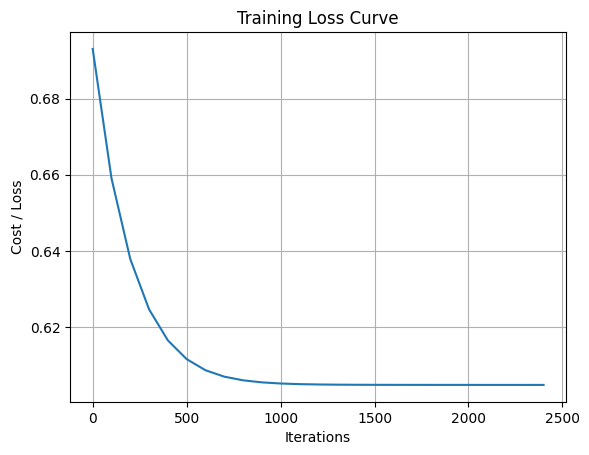

In [8]:
from eval_utils import *
from visualization import *

print_report(parameters)
plot_costs(costs)

# Let's try with Learning decays

In [9]:
def lr_schedule(i):
    if i < 500:
        return 0.008
    elif i < 1000:
        return 0.001
    elif i < 1500:
        return 0.0001
    elif i < 2000:
        return 0.00001
    else:
        return 0.01


In [10]:

def L_layer_model_with_leaning_decay(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, X_test=None, Y_test=None):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        ##update learnign rate digital
        learning_rate = lr_schedule(i)
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        cost = compute_cost(AL,Y)
            
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(train_x,parameters)
        test_pred = predict(test_x, parameters)
        train_acc = accuracy(train_pred, train_y)
        test_acc = accuracy(test_pred, test_y)
        print(f"Final train accuracy: {train_acc:.2f}%")
        print(f"Final test accuracy:  {test_acc:.2f}%")

    
    return parameters, costs

In [11]:
layers_dims = [12288, 64, 16, 5, 1] 

parameters, costs = L_layer_model_with_leaning_decay(train_x, train_y, layers_dims, learning_rate = 0.008,num_iterations = 2500, print_cost = True, X_test=test_x, Y_test=Y_test_org)

Cost after iteration 0: 0.693165156540514
Cost after iteration 100: 0.6623214547569527
Cost after iteration 200: 0.6418261826320482
Cost after iteration 300: 0.6285308544037146
Cost after iteration 400: 0.619900474409694
Cost after iteration 500: 0.6143189577668501
Cost after iteration 600: 0.6137796682761515
Cost after iteration 700: 0.6132695998052063
Cost after iteration 800: 0.612787234898859
Cost after iteration 900: 0.6123311298703649
Cost after iteration 1000: 0.6118999089107415
Cost after iteration 1100: 0.6118581105692612
Cost after iteration 1200: 0.6118165468788133
Cost after iteration 1300: 0.6117752166221243
Cost after iteration 1400: 0.6117341183396212


KeyboardInterrupt: 

In [ ]:
from eval_utils import *
from visualization import *

print_report(parameters)
plot_costs(costs)

# **It didn't do much so i think the problem is with the depth of the NN is not enough to recognize damaged buildings**

In [16]:

def L_layer_model_test(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, X_test=None, Y_test=None):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        cost = compute_cost(AL,Y)
            
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(train_x,parameters)
        test_pred = predict(test_x, parameters)
        train_acc = accuracy(train_pred, train_y)
        test_acc = accuracy(test_pred, test_y)
        print(f"Final train accuracy: {train_acc:.2f}%")
        print(f"Final test accuracy:  {test_acc:.2f}%")

    
    return parameters, costs

In [17]:
k = 25  # or 10

train_x_tiny = train_x[:, :k]
train_y_tiny = train_y[:, :k]
test_y_tiny = test_y[:, :k]
test_x_tiny= test_x[:, :k]

In [19]:
layers_dims = [12288, 64, 16, 5, 1] 
parameters, costs = L_layer_model_test(train_x_tiny, train_y_tiny, layers_dims, learning_rate = 0.001,num_iterations = 2500, print_cost = True, X_test=test_y_tiny, Y_test=test_x_tiny)

Cost after iteration 0: 0.6930852272806844
Cost after iteration 100: 0.6594483457482012
Cost after iteration 200: 0.6280974712157471
Cost after iteration 300: 0.5983759089356763
Cost after iteration 400: 0.5705890618189693
Cost after iteration 500: 0.5446223262603536
Cost after iteration 600: 0.520276113934339
Cost after iteration 700: 0.49741706054751
Cost after iteration 800: 0.47592821038875555
Cost after iteration 900: 0.45570574362946226
Cost after iteration 1000: 0.43665911471191216
Cost after iteration 1100: 0.4187149079078097
Cost after iteration 1200: 0.4018086077995168
Cost after iteration 1300: 0.3858838764037803
Cost after iteration 1400: 0.3708908293203533
Cost after iteration 1500: 0.35678457716325623
Cost after iteration 1600: 0.34352388475197876
Cost after iteration 1700: 0.3310701198203266
Cost after iteration 1800: 0.31938674146748847
Cost after iteration 1900: 0.3084385600643721
Cost after iteration 2000: 0.2981914869367704
Cost after iteration 2100: 0.28861219598408

In [14]:
def model(X, Y, layers_dims, learning_rate, num_iterations = 15000, print_cost = True, X_test=None, Y_test=None):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(train_x,train_y,parameters)
        test_pred = predict(test_x,test_y, parameters)
        print(f"Final train accuracy: {train_acc:.2f}%")
        print(f"Final test accuracy:  {test_acc:.2f}%")
    
    return parameters, costs

In [5]:
k = 25  # or 10

train_x_tiny = train_x[:, :k]
train_y_tiny = train_y[:, :k]
test_y_tiny = test_y[:, :k]
test_x_tiny= test_x[:, :k]

In [8]:
layers_dims = [3072, 256, 64, 16, 1] 
parameters, costs = L_layer_model(train_x_tiny, train_y_tiny, layers_dims, learning_rate = 0.01,num_iterations = 2500, print_cost = True, X_test=test_y_tiny, Y_test=test_x_tiny)
# parameters, costs = model(train_x_tiny, train_y_tiny, layers_dims, learning_rate = 0.001,num_iterations = 3500, print_cost = True, X_test=test_y_tiny, Y_test=test_x_tiny)

Cost after iteration 0: 0.6931472395100389
Cost after iteration 100: 0.5261529635681322
Cost after iteration 200: 0.42282997424912794
Cost after iteration 300: 0.35635196534483504
Cost after iteration 400: 0.31169336242918616
Cost after iteration 500: 0.2804779102948433
Cost after iteration 600: 0.25789853284031594
Cost after iteration 700: 0.24108644270708834
Cost after iteration 800: 0.22826019015470156
Cost after iteration 900: 0.21827190823998496
Cost after iteration 1000: 0.21035704041691983
Cost after iteration 1100: 0.20399116435515247
Cost after iteration 1200: 0.19880513494074545
Cost after iteration 1300: 0.19453310499015003
Cost after iteration 1400: 0.1909797132716559
Cost after iteration 1500: 0.1879987997406377
Cost after iteration 1600: 0.1854792537345515
Cost after iteration 1700: 0.183335392721005
Cost after iteration 1800: 0.1815002893424313
Cost after iteration 1900: 0.17992105686761123
Cost after iteration 2000: 0.178555463037299
Cost after iteration 2100: 0.1773694

In [9]:
def lr_schedule(i):
    if i < 500:
        return 0.008
    elif i < 1000:
        return 0.001
    elif i < 1500:
        return 0.0001
    elif i < 2000:
        return 0.00001
    else:
        return 0.01


In [17]:

def L_layer_model_with_leaning_decay(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, X_test=None, Y_test=None):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        ##update learnign rate digital
        learning_rate = lr_schedule(i)
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        cost = compute_cost(AL,Y)
            
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(X, parameters)
        test_pred  = predict(X_test, parameters)
    
        train_acc = accuracy(train_pred, Y)
        test_acc  = accuracy(test_pred, Y_test)
    
        print(f"Final train accuracy: {train_acc*100:.2f}%")
        print(f"Final test accuracy:  {test_acc*100:.2f}%")


    
    return parameters, costs

In [18]:
layers_dims = [3072, 256, 64, 16, 1] 
parameters, costs = L_layer_model_with_leaning_decay(
    train_x_tiny,
    train_y_tiny,
    layers_dims,
    learning_rate=0.01,
    num_iterations=2500,
    print_cost=True,
    X_test=test_x_tiny,
    Y_test=test_y_tiny
)

Cost after iteration 0: 0.6931470888943896
Cost after iteration 100: 0.553257674953872
Cost after iteration 200: 0.45845539440361516
Cost after iteration 300: 0.39269821567945784
Cost after iteration 400: 0.345807245437106
Cost after iteration 500: 0.3114425066815451
Cost after iteration 600: 0.3078130077556848
Cost after iteration 700: 0.30430913111699975
Cost after iteration 800: 0.3009253150627276
Cost after iteration 900: 0.2976562917362491
Cost after iteration 1000: 0.294497069612258
Cost after iteration 1100: 0.29418702567586424
Cost after iteration 1200: 0.29387802745776836
Cost after iteration 1300: 0.29357007039022104
Cost after iteration 1400: 0.2932631499295524
Cost after iteration 1500: 0.29295726155606483
Cost after iteration 1600: 0.2929267295413398
Cost after iteration 1700: 0.29289620779784864
Cost after iteration 1800: 0.2928656963211064
Cost after iteration 1900: 0.2928351951066415
Cost after iteration 2000: 0.29280470414997695
Cost after iteration 2100: 0.26677024565

In [16]:
print("train_x_tiny:", train_x_tiny.shape)
print("train_y_tiny:", train_y_tiny.shape)
print("test_x_tiny:", test_x_tiny.shape)
print("test_y_tiny:", test_y_tiny.shape)

preds = predict(train_x_tiny, parameters)
print("Unique predictions:", np.unique(preds))


train_x_tiny: (3072, 25)
train_y_tiny: (1, 25)
test_x_tiny: (3072, 25)
test_y_tiny: (1, 25)
Unique predictions: [1.]


In [6]:
print("Train positives:", np.sum(train_y))
print("Train negatives:", train_y.shape[1] - np.sum(train_y))

print("Test positives:", np.sum(test_y))
print("Test negatives:", test_y.shape[1] - np.sum(test_y))


Train positives: 1847
Train negatives: 765
Test positives: 242
Test negatives: 85
